<a href="https://colab.research.google.com/github/ImAli0/ML_and_DataScience/blob/main/20-Kmeans-Clustering/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Exploratory Data Analysis

In [2]:
df = pd.read_csv('/content/bank-full.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Continuous Feature Analysis

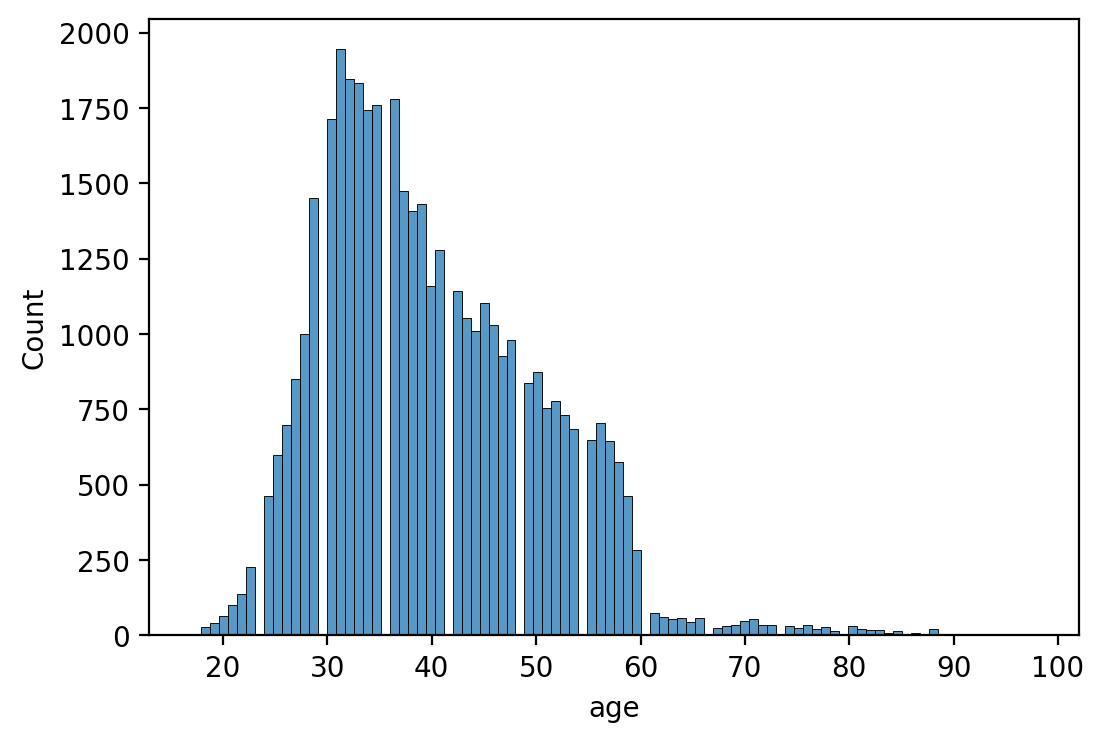

In [5]:
plt.figure(figsize=(6,4), dpi=200)
sns.histplot(df, x='age');

<Axes: xlabel='age', ylabel='Count'>

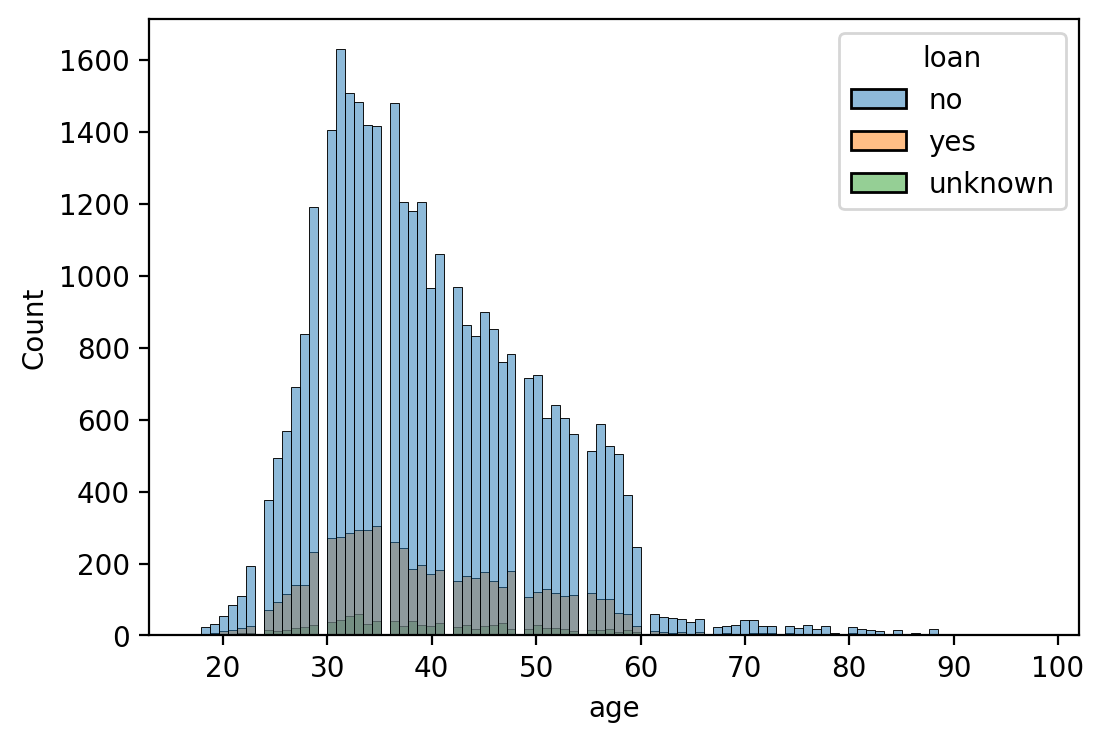

In [6]:
plt.figure(figsize=(6,4), dpi=200)
sns.histplot(df, x='age', hue='loan')

<Axes: xlabel='pdays', ylabel='Count'>

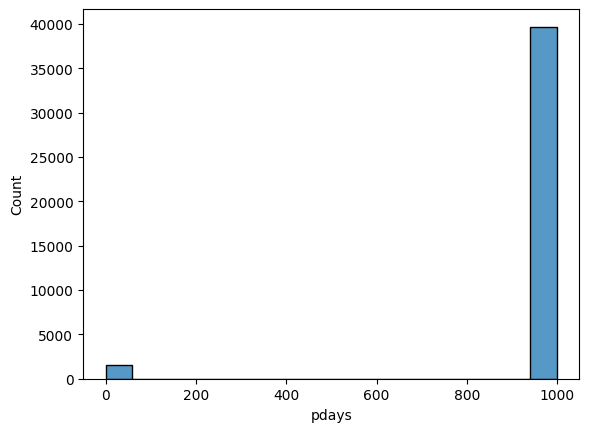

In [7]:
sns.histplot(df, x='pdays')

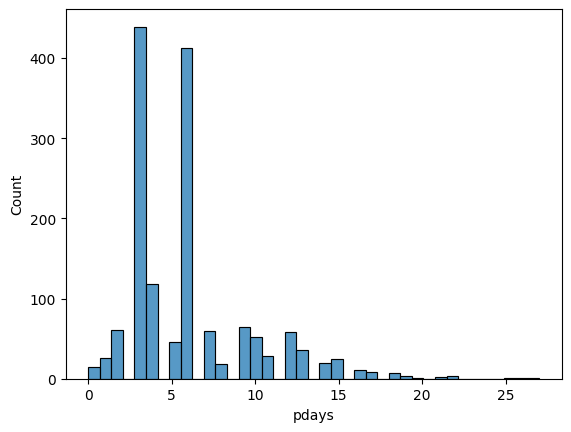

In [8]:
sns.histplot(data=df[df['pdays']!=999], x='pdays');

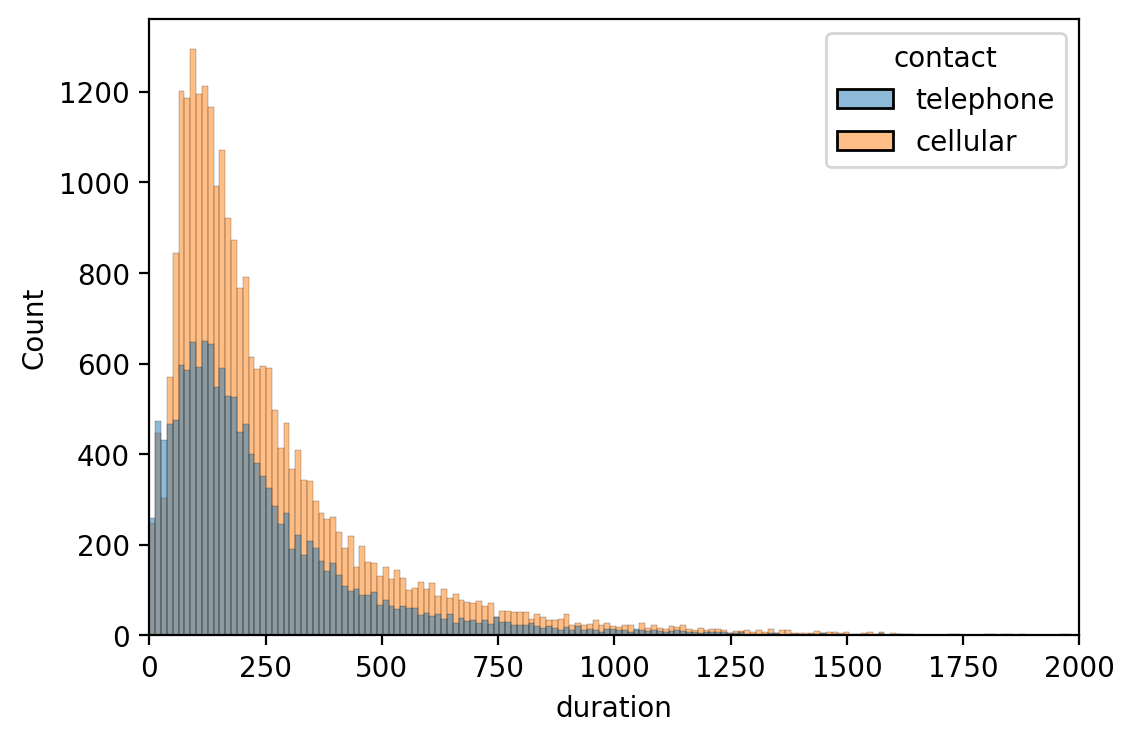

In [9]:
plt.figure(figsize=(6,4), dpi=200)
sns.histplot(data=df, x='duration', hue='contact')
plt.xlim(0, 2000);

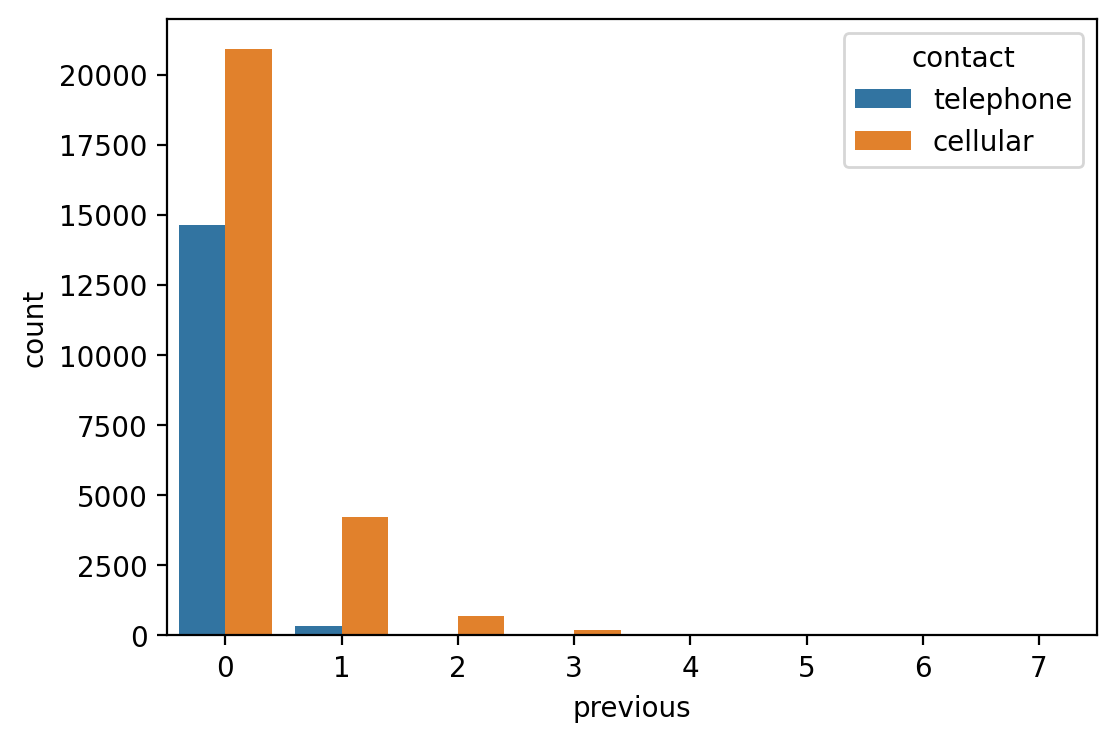

In [10]:
plt.figure(figsize=(6,4), dpi=200)
sns.countplot(df ,x='previous', hue='contact');

<Axes: xlabel='contact', ylabel='count'>

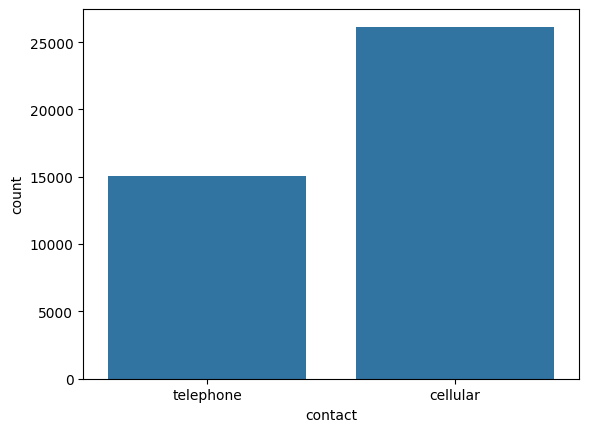

In [11]:
sns.countplot(df, x='contact')

### Categorical Features

In [12]:
df['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

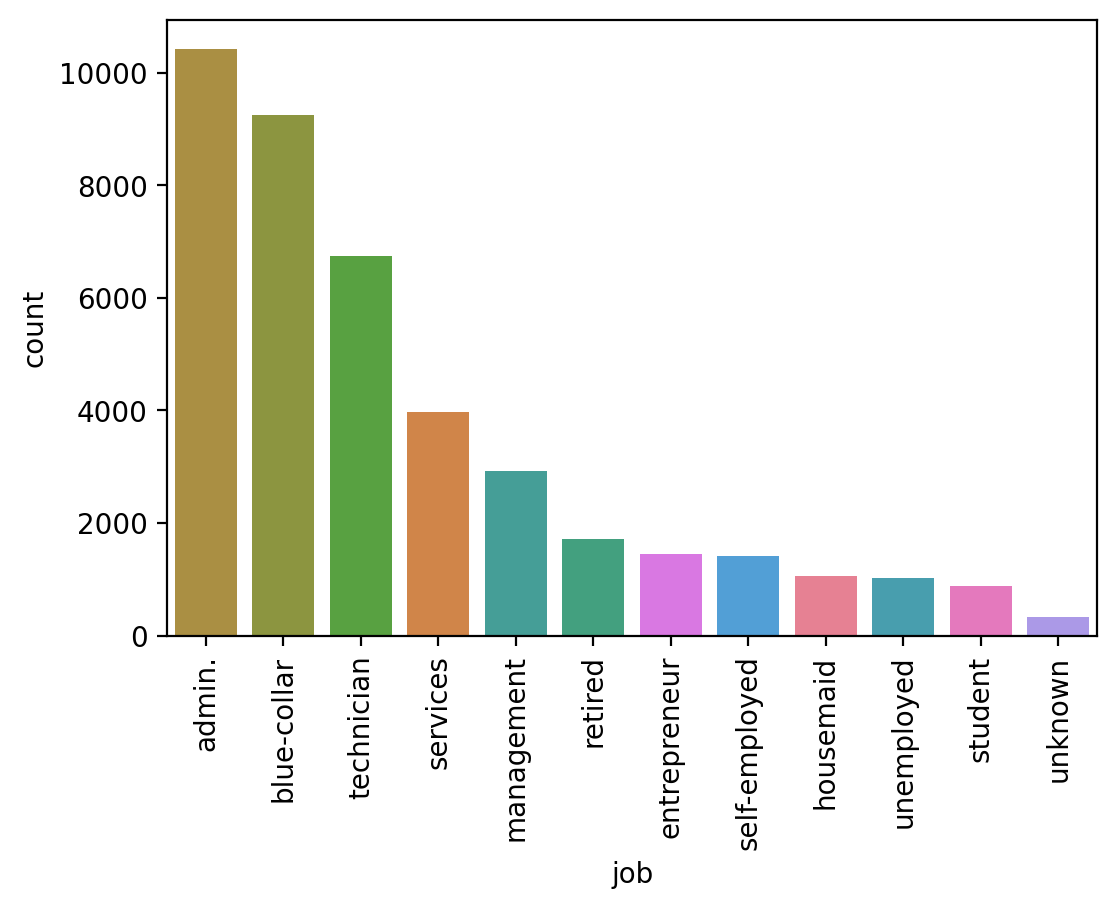

In [14]:
plt.figure(figsize=(6,4), dpi=200)
sns.countplot(df, x='job', order=df['job'].value_counts().index, hue='job')
plt.xticks(rotation=90);

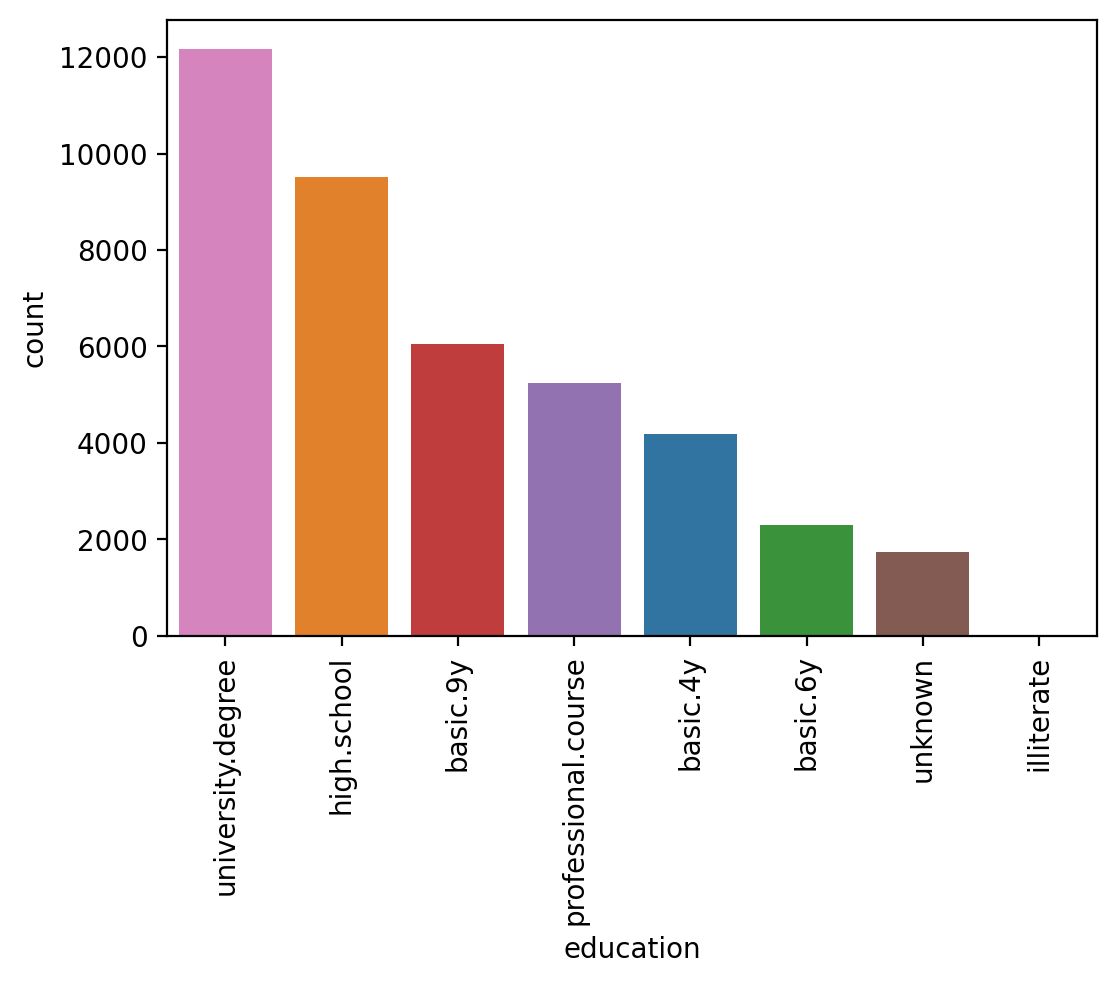

In [17]:
plt.figure(figsize=(6,4), dpi=200)
sns.countplot(df, x='education', order=df['education'].value_counts().index, hue='education')
plt.xticks(rotation=90);

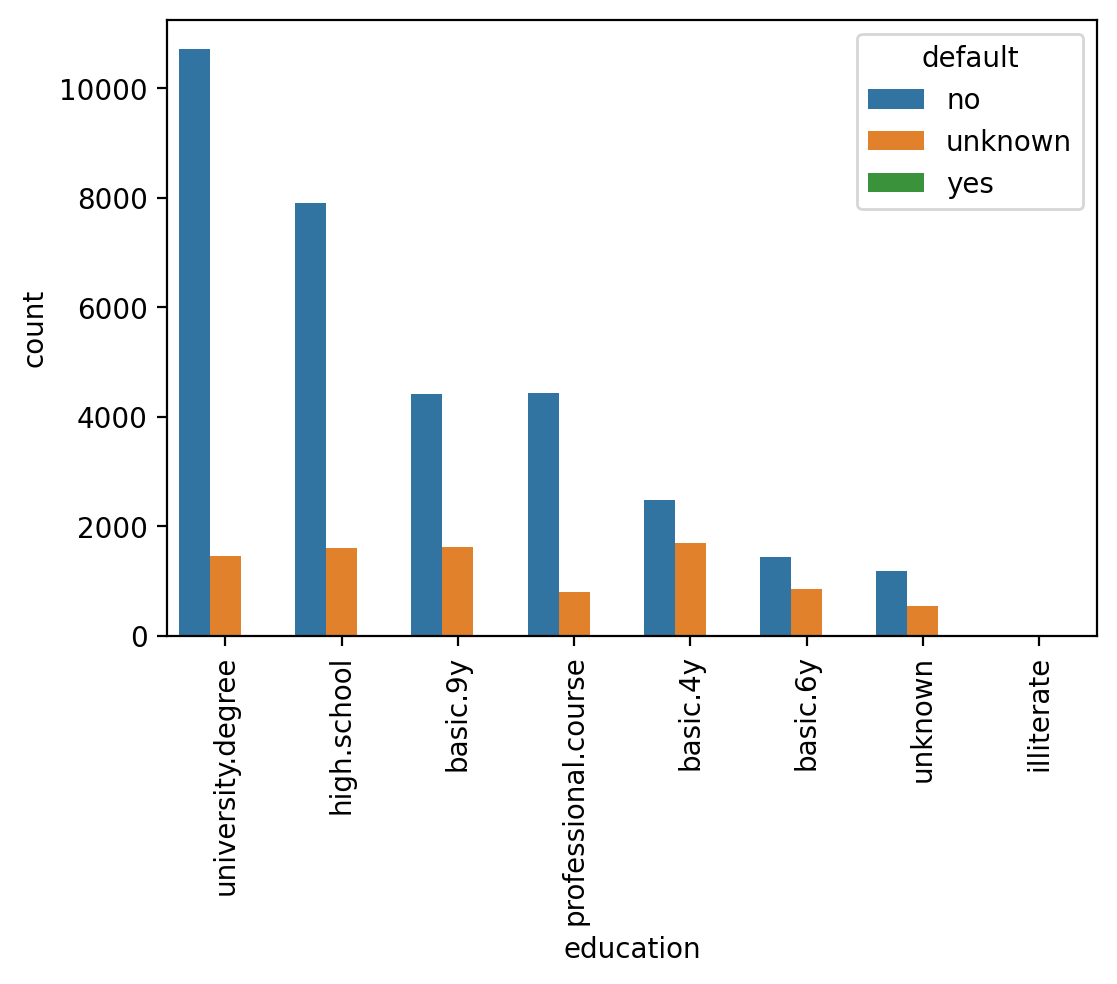

In [18]:
plt.figure(figsize=(6,4), dpi=200)
sns.countplot(df, x='education', order=df['education'].value_counts().index, hue='default')
plt.xticks(rotation=90);

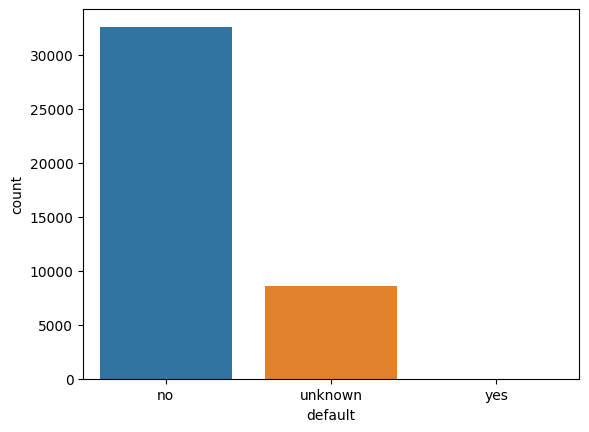

In [22]:
sns.countplot(df, x='default', hue='default');

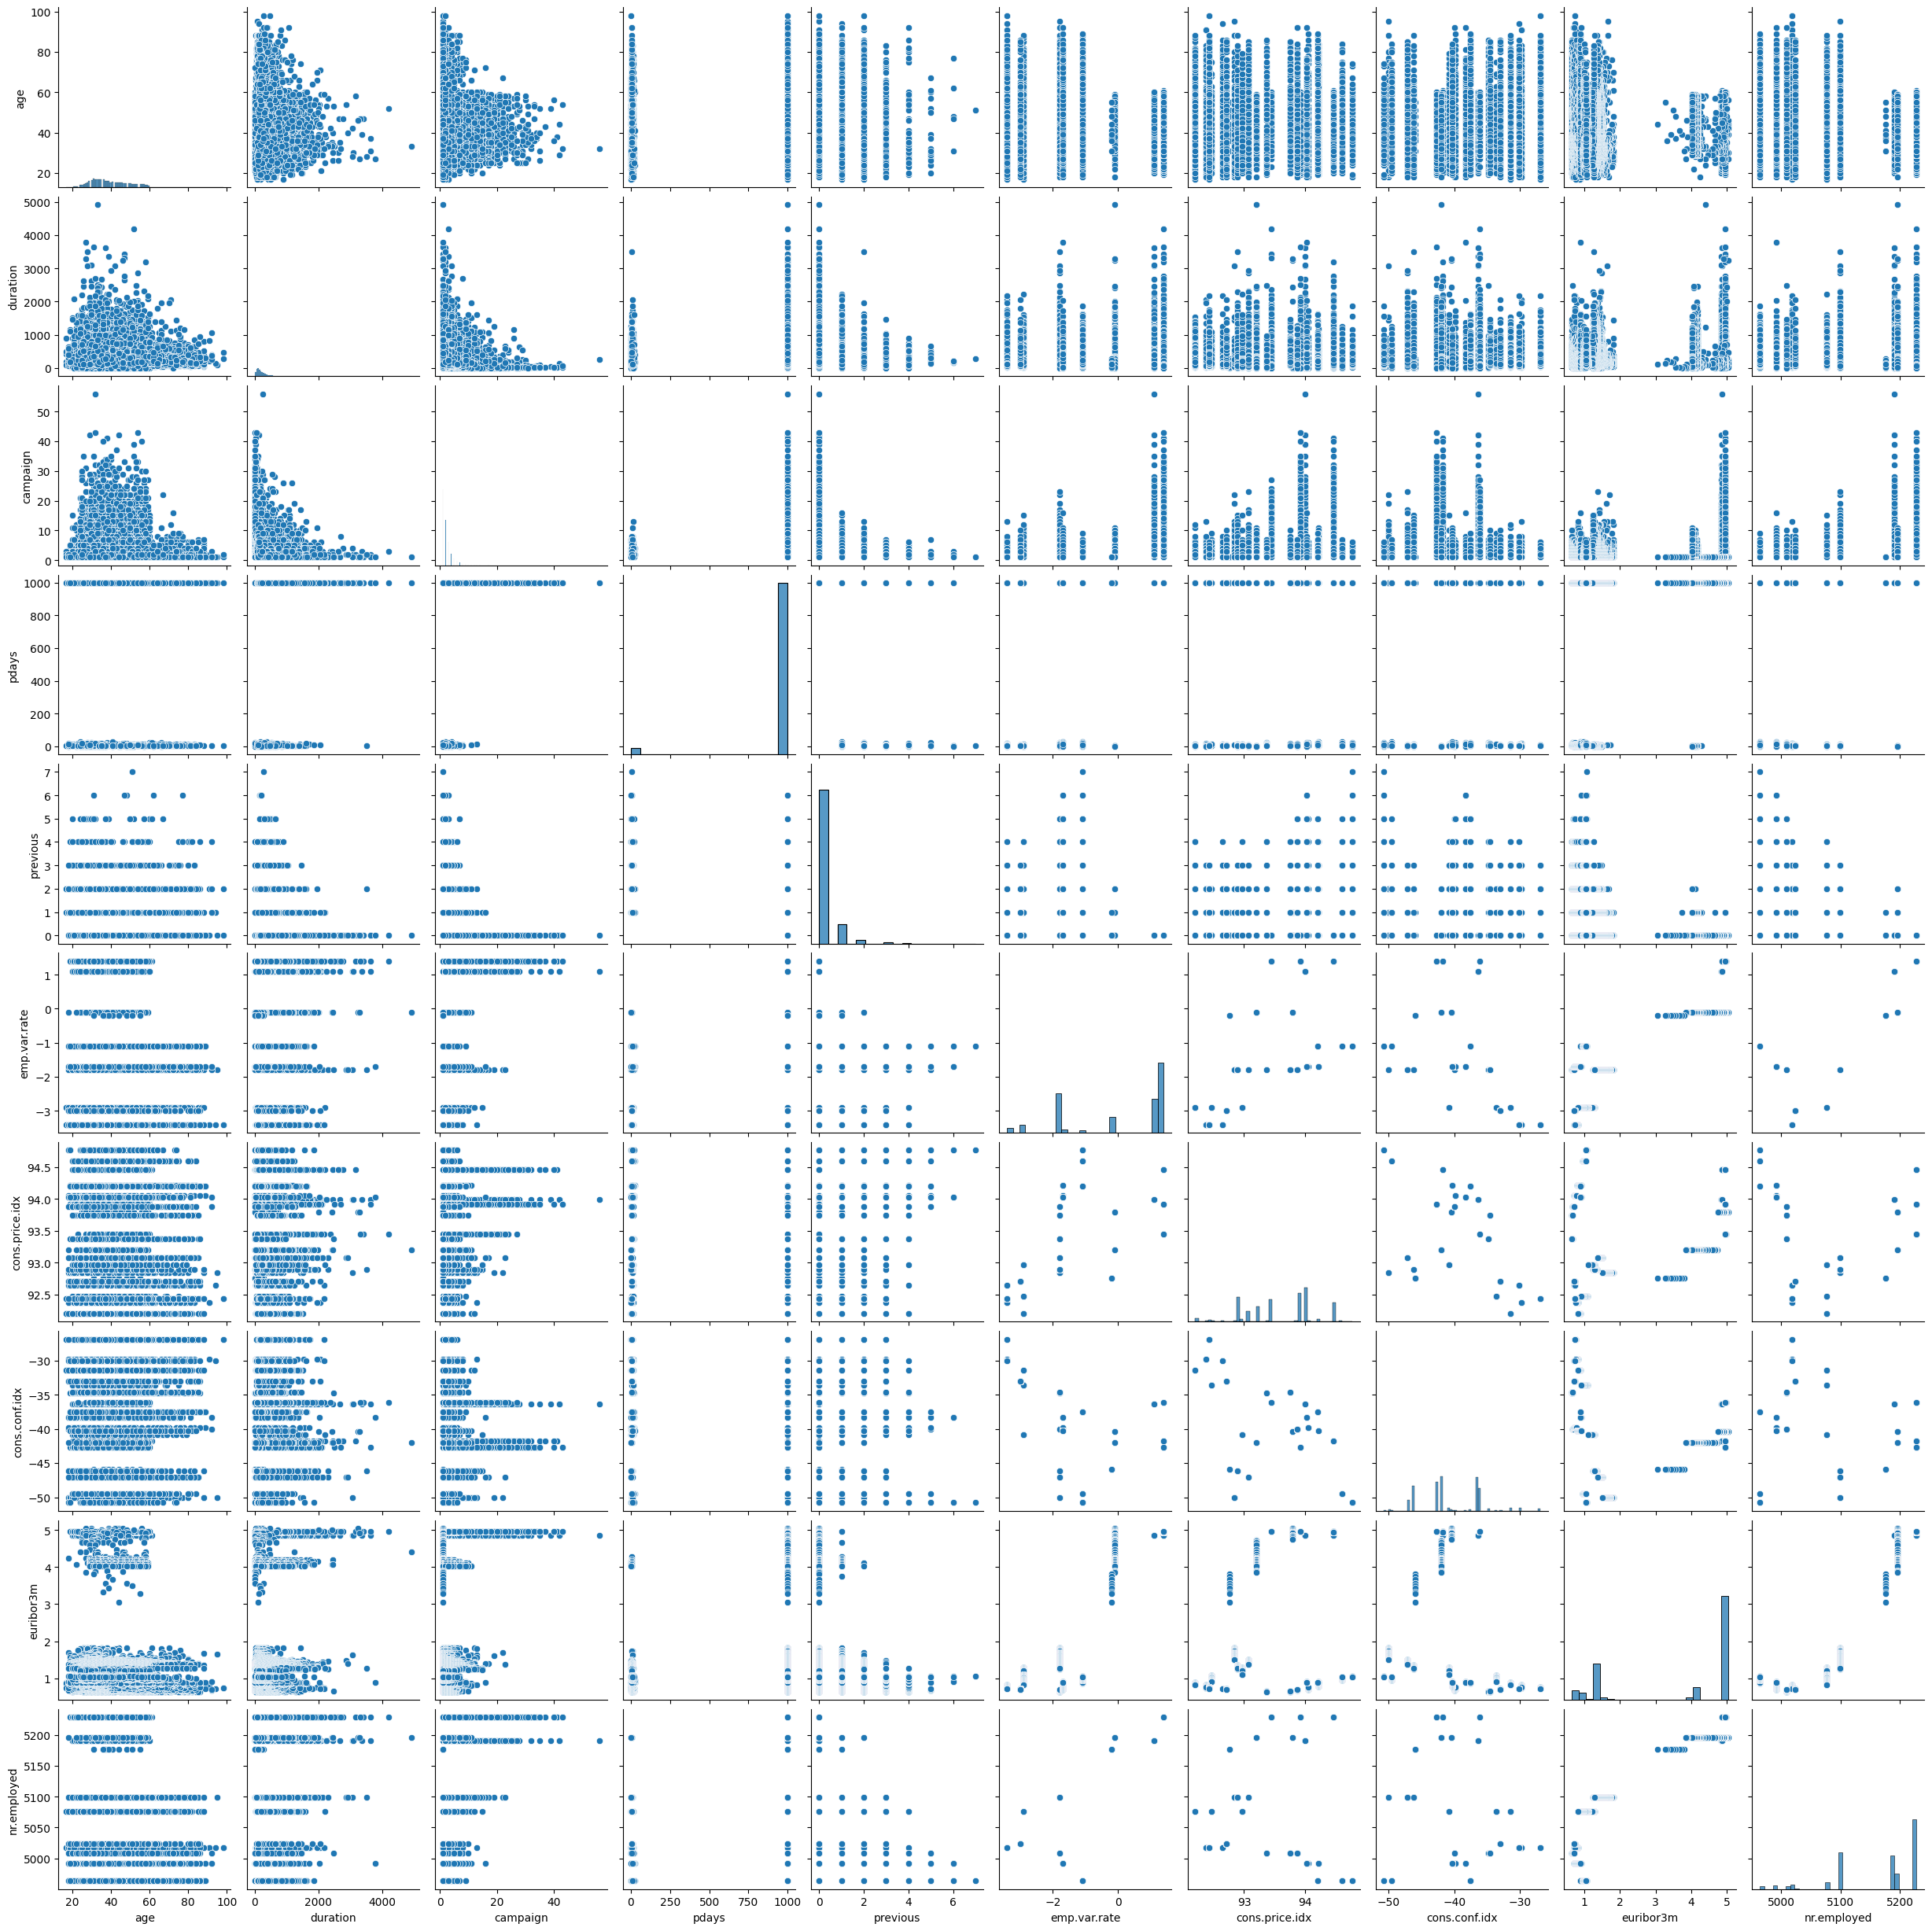

In [23]:
sns.pairplot(df);


## Clustering

### Data Prep

In [24]:
X = pd.get_dummies(df)
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,True,False,False,False,False,False,True,False,False,True
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,True,False,False,False,False,False,True,False,True,False
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,True,False,False,False,False,False,True,False,True,False
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,True,False,False,False,False,False,True,False,False,True


In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = KMeans(n_clusters=2)
cluster_labels = model.fit_predict(X_scaled)
cluster_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [29]:
len(X_scaled)

41188

In [30]:
len(cluster_labels)

41188

In [31]:
X['Cluster'] = cluster_labels

<Axes: >

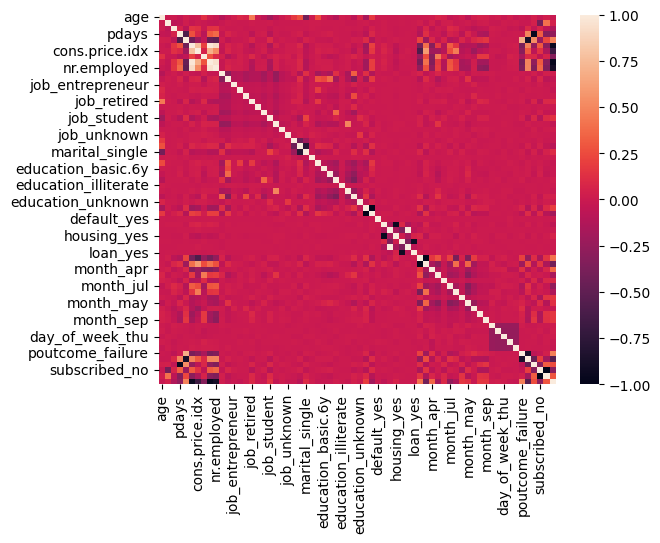

In [32]:
sns.heatmap(X.corr())

In [33]:
X.corr()['Cluster']

age                    -0.019767
duration                0.039581
campaign               -0.129103
pdays                  -0.267714
previous                0.478493
                          ...   
poutcome_nonexistent   -0.544406
poutcome_success        0.254406
subscribed_no          -0.294472
subscribed_yes          0.294472
Cluster                 1.000000
Name: Cluster, Length: 66, dtype: float64

In [35]:
X.corr()['Cluster'].sort_values()[:-1]

euribor3m              -0.959328
emp.var.rate           -0.932622
nr.employed            -0.886190
cons.price.idx         -0.679350
poutcome_nonexistent   -0.544406
                          ...   
subscribed_yes          0.294472
month_apr               0.357942
contact_cellular        0.410444
poutcome_failure        0.464320
previous                0.478493
Name: Cluster, Length: 65, dtype: float64

<Axes: >

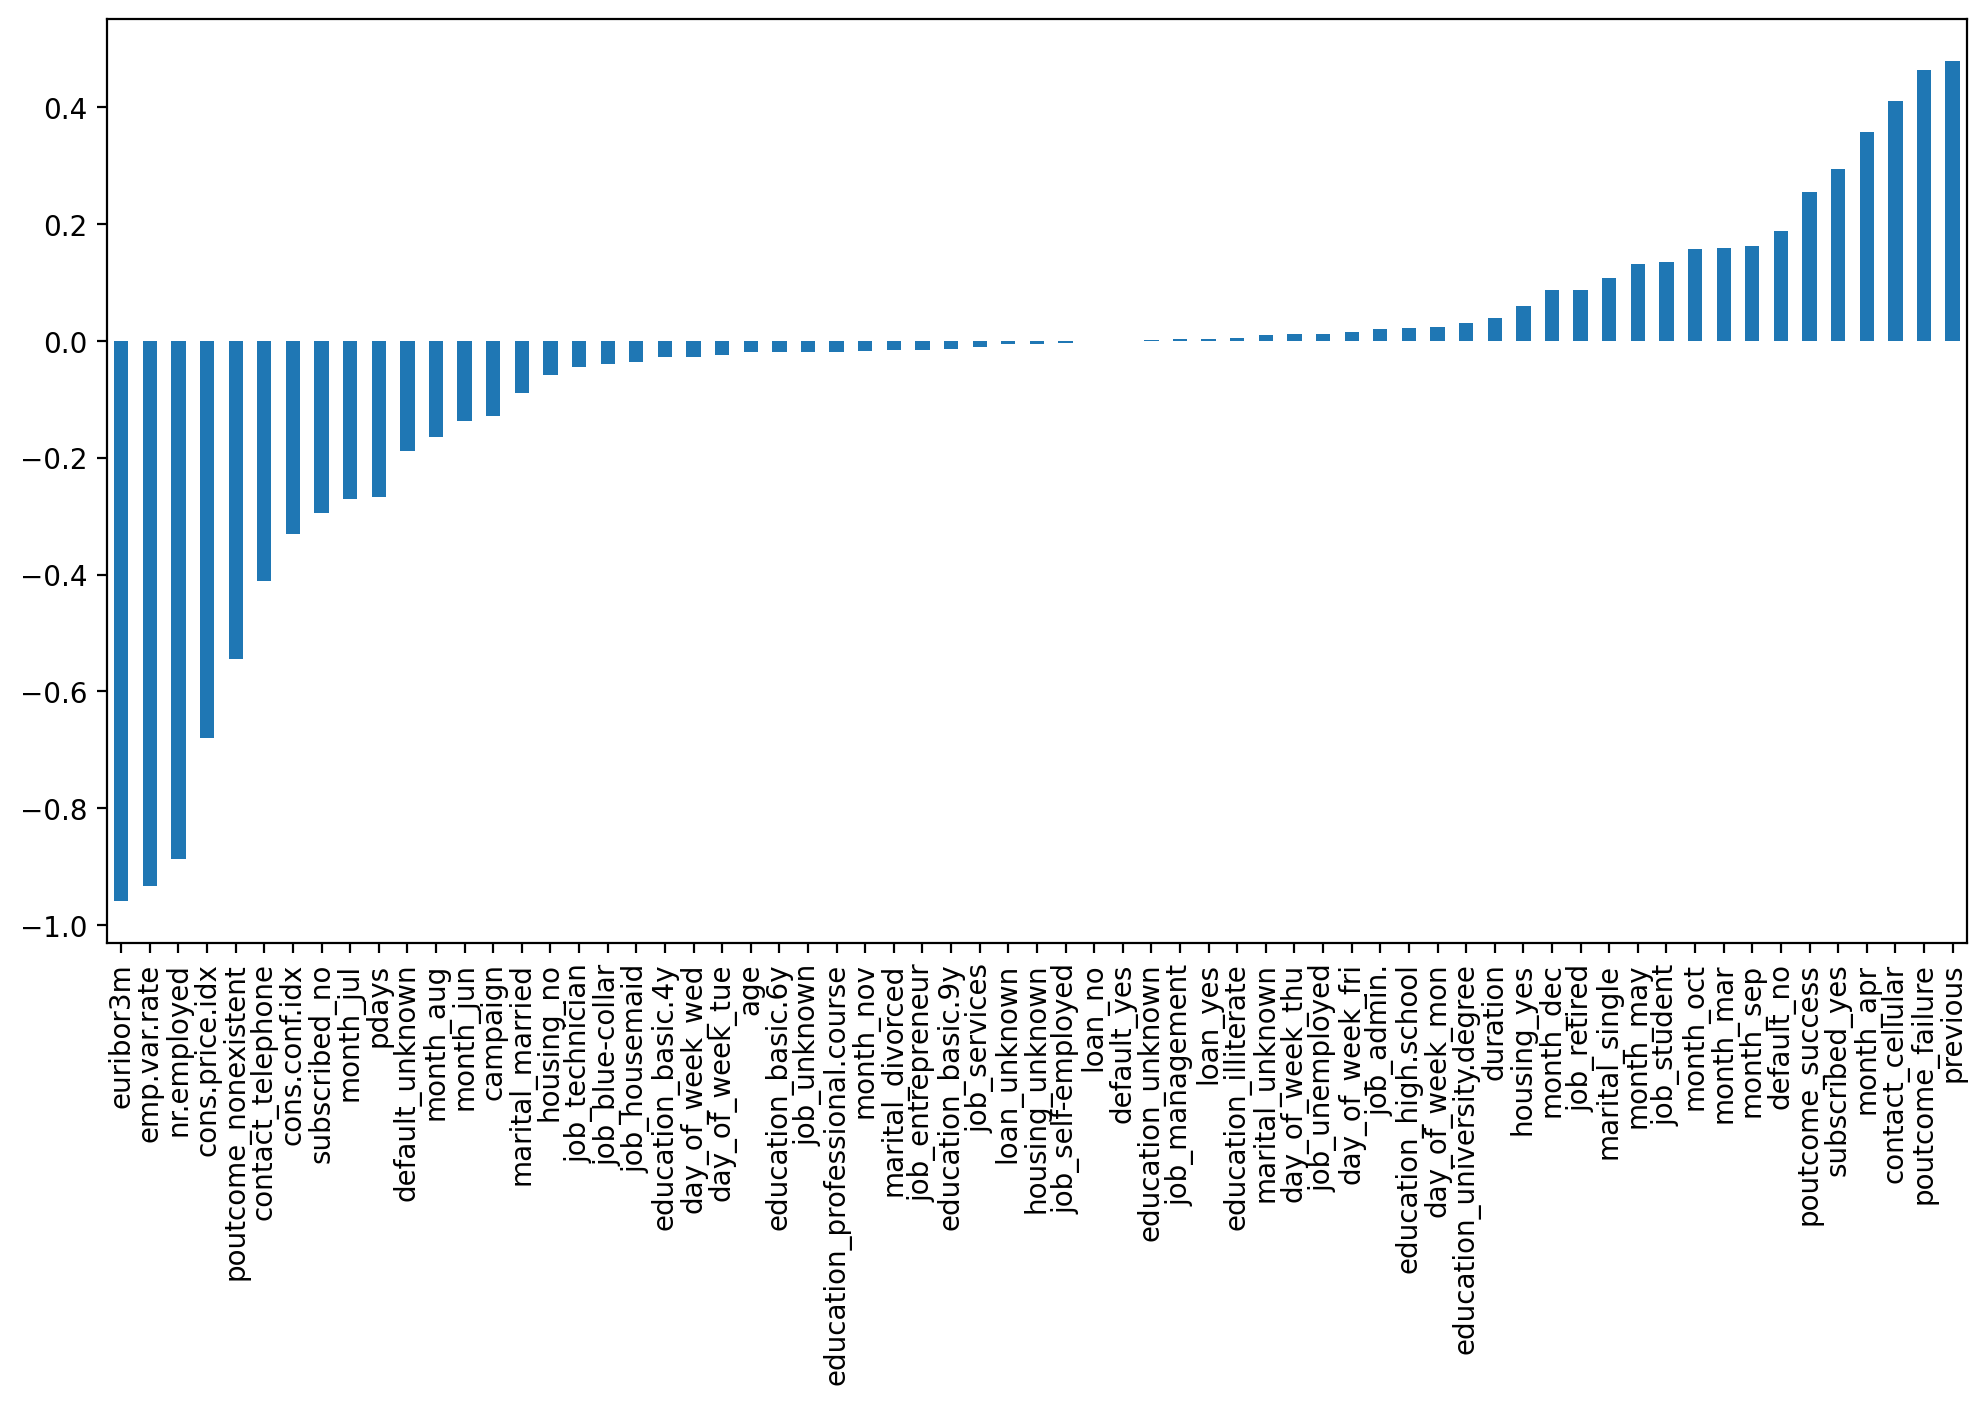

In [42]:
plt.figure(figsize=(12,6), dpi=200)
X.corr()['Cluster'].sort_values()[:-1].plot(kind='bar')

## Choosing K Value

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

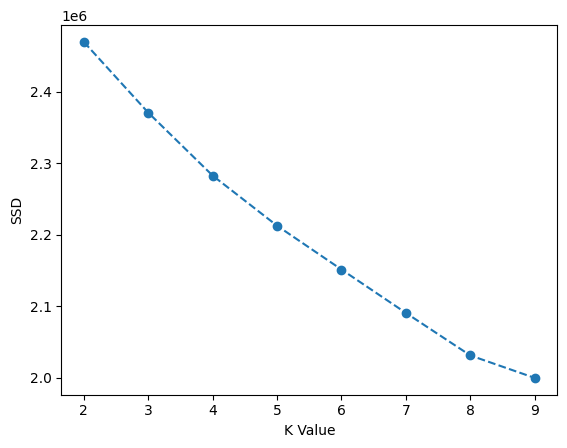

In [46]:
ssd = []

for k in range(2,10):
  model = KMeans(k)
  model.fit(X_scaled)

  ssd.append(model.inertia_)

plt.plot(range(2,10), ssd, 'o--')
plt.xlabel('K Value')
plt.ylabel('SSD');

In [47]:
ssd

[2469792.3616627455,
 2370786.3951452635,
 2282647.421393222,
 2212493.2528182305,
 2151167.1682897457,
 2090414.6617083163,
 2030896.4882420178,
 1999422.4387272275]

In [48]:
pd.Series(ssd).diff()

0             NaN
1   -99005.966517
2   -88138.973752
3   -70154.168575
4   -61326.084528
5   -60752.506581
6   -59518.173466
7   -31474.049515
dtype: float64

<Axes: >

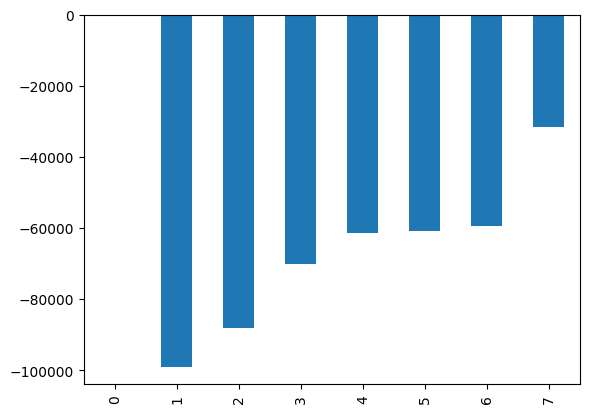

In [49]:
pd.Series(ssd).diff().plot(kind='bar')